In [28]:
def buy_actions(price):
  global money
  global amount
  print("Money = ",money)
  print(price)
  amount += money/price
  money = 0
  print("Amount = ",amount)

def sell_actions(price):
  global money
  global amount
  print("Amount = ",amount)
  print(price)
  money += amount*price
  amount = 0
  print("Money = ",money)

In [29]:
import yfinance as yf
import datetime
data = yf.Ticker("GC=F") #Я спочатку робив акції beyond meat, але там один перетин і він неприкольний
bey_meat_3m = data.history(period='3mo').reset_index()
bey_meat_6m = data.history(period='6mo').reset_index()
money = 10000
amount = 0
print("Кількість = ", amount, "   гроші = ", money)
bey_meat_6m['50d_MA'] = bey_meat_6m['Close'].rolling(window=30).mean()
bey_meat_6m['30d_MA'] = bey_meat_6m['Close'].rolling(window=7).mean()
status = []
longs = []
shorts = []
for i in range(len(bey_meat_3m)):
   date_3m = bey_meat_3m['Date'][i]
   kov_ser_long = bey_meat_6m[bey_meat_6m['Date'] == date_3m]['50d_MA'].values[0]
   longs.append(kov_ser_long)
   kov_ser_short = bey_meat_6m[bey_meat_6m['Date'] == date_3m]['30d_MA'].values[0]
   shorts.append(kov_ser_short)
   if kov_ser_short > kov_ser_long:
        if len(longs) == 1:
          buy_actions(bey_meat_3m.iloc[i]["Close"])
          continue
        status.append("Buy")
        try:
          if status[-1] != status[-2]:
            buy_actions(bey_meat_3m.iloc[i]["Close"])
        except:
          print(" ")
   else:
        #if len(longs) == 1:
          #continue
        status.append("Sell")
        try:
          if status[-1] != status[-2]:
            sell_actions(bey_meat_3m.iloc[i]["Close"])
        except:
          print(" ")
   print(f"Дата: {date_3m}, Довге ковзне: {round(kov_ser_long, 2)}, Коротке ковзне: {round(kov_ser_short, 2)}, Сигнал: {status[-1]}")
print(status)
if money != 0:
  print("Money: ", money)
else:
  print(amount)
  print(bey_meat_3m.iloc[-1]["Close"])
  print("Price of our stocks: ",amount*bey_meat_3m.iloc[-1]["Close"])

Кількість =  0    гроші =  10000
Money =  10000
2951.300048828125
Amount =  3.3883372868071167
 
Дата: 2025-04-08 00:00:00-04:00, Довге ковзне: 2987.96, Коротке ковзне: 3058.61, Сигнал: Buy
Дата: 2025-04-09 00:00:00-04:00, Довге ковзне: 2992.62, Коротке ковзне: 3049.14, Сигнал: Buy
Дата: 2025-04-10 00:00:00-04:00, Довге ковзне: 3001.69, Коротке ковзне: 3054.33, Сигнал: Buy
Дата: 2025-04-11 00:00:00-04:00, Довге ковзне: 3014.53, Коротке ковзне: 3066.09, Сигнал: Buy
Дата: 2025-04-14 00:00:00-04:00, Довге ковзне: 3025.02, Коротке ковзне: 3081.49, Сигнал: Buy
Дата: 2025-04-15 00:00:00-04:00, Довге ковзне: 3035.32, Коротке ковзне: 3111.01, Сигнал: Buy
Дата: 2025-04-16 00:00:00-04:00, Довге ковзне: 3049.03, Коротке ковзне: 3164.63, Сигнал: Buy
Дата: 2025-04-17 00:00:00-04:00, Довге ковзне: 3062.1, Коротке ковзне: 3213.24, Сигнал: Buy
Дата: 2025-04-21 00:00:00-04:00, Довге ковзне: 3078.82, Коротке ковзне: 3263.2, Сигнал: Buy
Дата: 2025-04-22 00:00:00-04:00, Довге ковзне: 3095.81, Коротке ковз

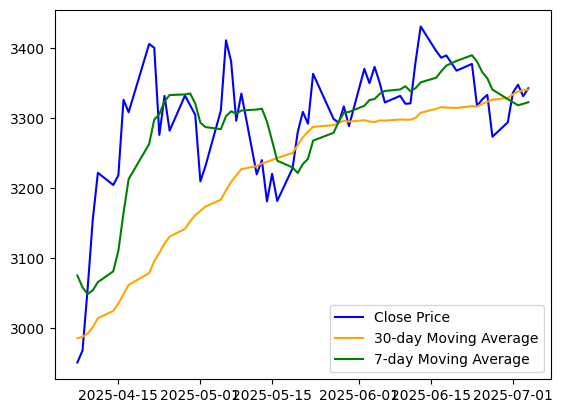

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
merged = pd.merge(bey_meat_3m, bey_meat_6m, on = ["Date", "Close"])
merged['30d_MA'] = bey_meat_6m['Close'].rolling(window=30).mean()
merged['7d_MA'] = merged['Close'].rolling(window=7).mean()
plt.plot(merged['Date'], merged['Close'], label='Close Price', color='blue')

# Лінія для 50-денної ковзної середньої
plt.plot(merged['Date'], longs, label='30-day Moving Average', color='orange')

# Лінія для 30-денної ковзної середньої
plt.plot(merged['Date'], shorts, label='7-day Moving Average', color='green')
plt.legend()